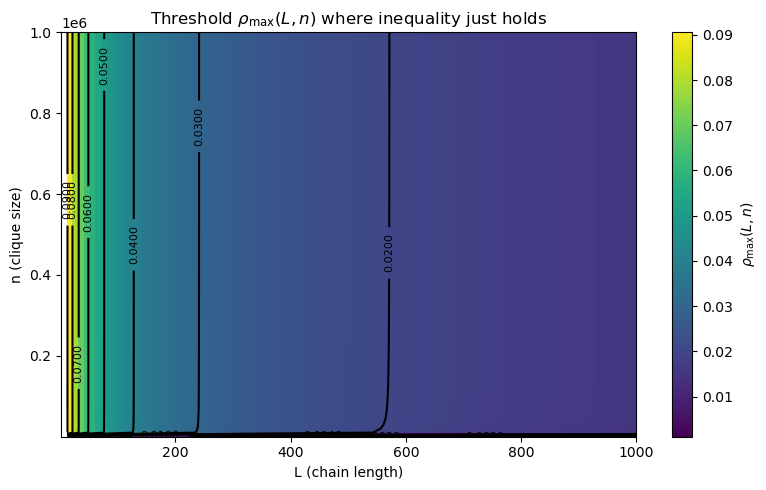

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define rho_max(L, n)
def rho_max(L, n):
    # coefficients for a*rho^2 + b*rho + c <= 0
    a = 4 * L**3 * (L + n)
    b = 4 * L**2 * n
    c = -n * L**2 + 3 * L * n + 2 * L - n - 3

    # discriminant
    disc = b**2 - 4 * a * c
    # If discriminant < 0, no real roots -> return NaN
    if disc < 0:
        return np.nan

    sqrt_disc = np.sqrt(disc)
    rho_plus = (-b + sqrt_disc) / (2 * a)
    # Only positive rho in (0,1) is meaningful
    if rho_plus <= 0:
        return np.nan
    return min(1.0, rho_plus)

# Make a grid
L_vals = np.linspace(2, 1000, 100)   # chain length
n_vals = np.linspace(5, 1000000, 100) # clique size (assumed reasonably large)
L_grid, n_grid = np.meshgrid(L_vals, n_vals)

rho_grid = np.zeros_like(L_grid, dtype=float)
rho_grid[:] = np.nan

for i in range(L_grid.shape[0]):
    for j in range(L_grid.shape[1]):
        L = L_grid[i, j]
        n = n_grid[i, j]
        rho_grid[i, j] = rho_max(L, n)

# Plot heatmap with level curves
fig, ax = plt.subplots(figsize=(8, 5))
hm = ax.imshow(
    rho_grid,
    origin="lower",
    extent=[L_vals.min(), L_vals.max(), n_vals.min(), n_vals.max()],
    aspect="auto"
)
plt.colorbar(hm, ax=ax, label=r"$\rho_{\max}(L,n)$")

# Add contour lines for specific rho levels
levels = [0.0005, 0.001, 0.002, 0.003, 0.004, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
cs = ax.contour(
    L_grid,
    n_grid,
    rho_grid,
    levels=levels,
    colors='black',

)
ax.clabel(cs, inline=True, fontsize=8)

ax.set_xlabel("L (chain length)")
ax.set_ylabel("n (clique size)")
ax.set_title(r"Threshold $\rho_{\max}(L,n)$ where inequality just holds")

plt.tight_layout()
plt.show()